# A Brief Look at Aggregate and Per Person Greenhouse Gas Emissions in Washington State

## Lelia Hampton November 13, 2018

According to the State of Washington, "This indicator tracks purchases made in Washington and measures the output of greenhouse gases related to product life cycles. The index shows how consumer purchasing patterns and habits affect climate change." The data set contains data for aggregate greenhouse emissions and greenhouse emissions per person from 2000 to 2010. 

Goals: The goal of this case study is to do an exploratory analysis on the given dataset, using descriptive statistics, data visualization, and linear regression where appropriate. 

This data set was retrieved from https://catalog.data.gov/dataset/climate-change-index in November 2018. 

In [1]:
#import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [2]:
#Create a dataframe of the data set
df = pd.read_csv("Climate_Change_Index.csv")
df

,Year,Aggregate,Per Person,Per $ Spent
0,2000,100.00,100.00,100.00
1,2001,103.32,102.00,98.41
2,2002,108.00,105.05,98.59
3,2003,109.67,105.51,95.59
4,2004,112.38,106.69,93.47
5,2005,111.58,104.41,91.92
6,2006,112.54,103.32,88.24
7,2007,115.71,104.52,88.05
8,2008,116.20,103.64,85.41
9,2009,119.46,105.53,86.83


In [3]:
#Descriptive statistics for Aggregate column
agg_desc = df["Aggregate"].describe()
agg_desc

count     11.000000
mean     111.120000
std        5.674968
min      100.000000
25%      108.835000
50%      112.380000
75%      114.585000
max      119.460000
Name: Aggregate, dtype: float64

In [4]:
#Descriptive statistics for Per Person column
pp_desc = df["Per Person"].describe()
pp_desc

count     11.000000
mean     103.647273
std        2.309199
min       99.450000
25%      102.660000
50%      104.410000
75%      105.280000
max      106.690000
Name: Per Person, dtype: float64

In [12]:
#Descriptive statistics for Per $ Spent column
pms_desc = df["Per $ Spent"].describe()
pms_desc

count     11.000000
mean      92.209091
std        5.298225
min       85.410000
25%       87.920000
50%       91.920000
75%       97.000000
max      100.000000
Name: Per $ Spent, dtype: float64

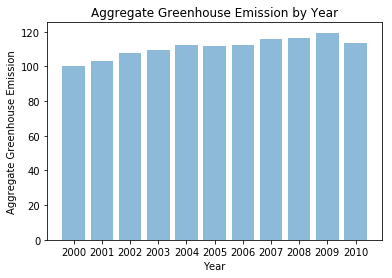

In [5]:
#Bar graph showing the aggregate greenhouse emission per year
objects = df["Year"]
y_pos = np.arange(len(objects))

plt.bar(y_pos, df["Aggregate"], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel("Year")
plt.ylabel('Aggregate Greenhouse Emission')
plt.title('Aggregate Greenhouse Emission by Year')

plt.show()

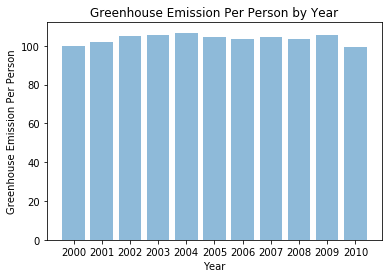

In [6]:
#Bar graph showing the aggregate greenhouse emission per year
objects = df["Year"]
y_pos = np.arange(len(objects))

plt.bar(y_pos, df["Per Person"], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel("Year")
plt.ylabel('Greenhouse Emission Per Person')
plt.title('Greenhouse Emission Per Person by Year')

plt.show()

In [7]:
#Linear regression for x = year and y = aggregate greenhouse emission
slope, intercept, r_value, p_value, std_err = sp.linregress(df["Year"], df["Aggregate"])
print("slope: " + str(slope))
print("intercept: " + str(intercept))
print("r-value: " + str(r_value))
print("p-value: " + str(p_value))
print("std error: " + str(std_err))

slope: 1.5336363636363637
intercept: -2963.8209090909095
r-value: 0.896304001230257
p-value: 0.00018731931853936933
std error: 0.2529186108048596


In [8]:
#Prediction of greenhouse emissions for the next five years
for year in range(2019, 2024):
    greenhouseEmission = (slope * year) + intercept
    print("Aggregate emissions for " + str(year) + ": " + str(greenhouseEmission))

Aggregate emissions for 2019: 132.590909090909
Aggregate emissions for 2020: 134.1245454545451
Aggregate emissions for 2021: 135.65818181818167
Aggregate emissions for 2022: 137.19181818181778
Aggregate emissions for 2023: 138.72545454545434


Text(0.5,1,'Aggregate Greenhouse Emission by Year')

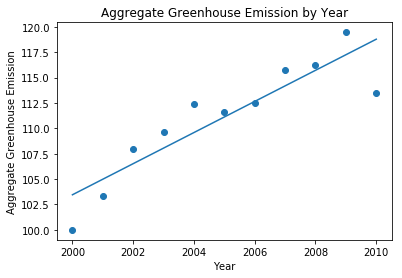

In [9]:
#Plot the linear regession equation on a line
years = df["Year"].tolist()
y_vals = [slope * i + intercept for i in years] #create a list of y values

plt.scatter(df["Year"], df["Aggregate"])
plt.plot(df["Year"], y_vals) #plot a line
plt.xlabel("Year")
plt.ylabel('Aggregate Greenhouse Emission')
plt.title('Aggregate Greenhouse Emission by Year')

In [10]:
#Linear regression for x = year and y = greenhouse emission per person
slope, intercept, r_value, p_value, std_err = sp.linregress(df["Year"], df["Per Person"])
print("slope: " + str(slope))
print("intercept: " + str(intercept))
print("r-value: " + str(r_value))
print("p-value: " + str(p_value))
print("std error: " + str(std_err))

slope: 0.01627272727272733
intercept: 71.02045454545444
r-value: 0.023371966464390583
p-value: 0.9456198305773147
std error: 0.23201987462763227


Text(0.5,1,'Greenhouse Emission Per Person by Year')

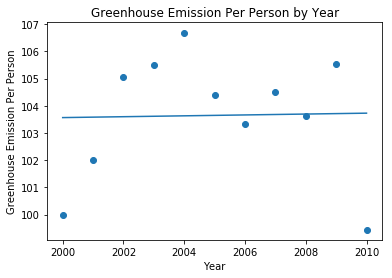

In [11]:
#Plot the linear regession equation on a line
years = df["Year"].tolist()
y_vals = [slope * i + intercept for i in years] #create a list of y values

plt.scatter(df["Year"], df["Per Person"])
plt.plot(df["Year"], y_vals) #plot a line
plt.xlabel("Year")
plt.ylabel('Greenhouse Emission Per Person')
plt.title('Greenhouse Emission Per Person by Year')

In [14]:
#Linear regression for x = per $ spent and y = aggregate greenhouse emission
slope, intercept, r_value, p_value, std_err = sp.linregress(df["Per $ Spent"], df["Aggregate"])
print("slope: " + str(slope))
print("intercept: " + str(intercept))
print("r-value: " + str(r_value))
print("p-value: " + str(p_value))
print("std error: " + str(std_err))

slope: -0.971903965722474
intercept: 200.73838113020958
r-value: -0.9073824062122166
p-value: 0.00011453137914485325
std error: 0.1500642971063384


Text(0.5,1,'Aggregate Greenhouse Emission by Per $ Spent')

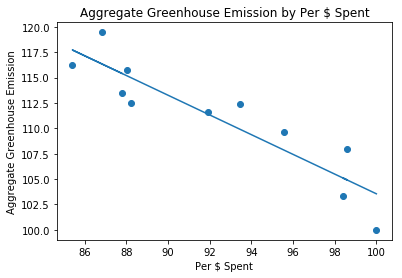

In [15]:
#Plot the linear regession equation on a line
money_spent = df["Per $ Spent"].tolist()
y_vals = [slope * i + intercept for i in money_spent] #create a list of y values

plt.scatter(df["Per $ Spent"], df["Aggregate"])
plt.plot(df["Per $ Spent"], y_vals) #plot a line
plt.xlabel("Per $ Spent")
plt.ylabel('Aggregate Greenhouse Emission')
plt.title('Aggregate Greenhouse Emission by Per $ Spent')